# Predicting Insurance Premiums
~ our dataset contains a Few attributes for each person such as Age,sex,BMI,children,smocker,region and their charges

Target

~ To use this info to predict charges for new customers

In [7]:
import pandas as pd

In [8]:
# Load the insurance data 
dt=pd.read_csv(r'D:\data science and deepl learning 20 case studies\datascienceforbusiness-master\insurance.csv')

In [9]:
# Lets check our data or preview 
dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# Let's see the type and info about our data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
# Let's check the statstics of our data for the features 
dt.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
# Summary os shape of data,features in data,Missing values in data,Unique values in data
print('(rows,columns):',dt.shape)
print('\nfeatures:\n',dt.columns.tolist())
print('missing values:',dt.isnull().sum())
print('unique vales:',dt.nunique())

(rows,columns): (1338, 7)

features:
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
missing values: age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
unique vales: age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [21]:
# correlation matrix to watch out in the data 
dt.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [24]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


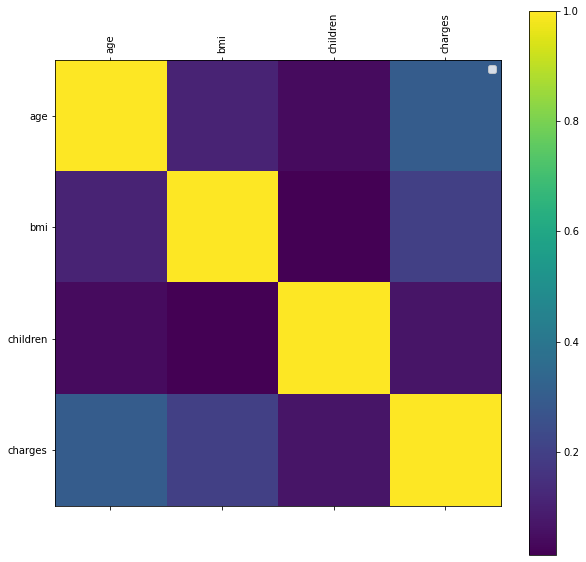

In [25]:
#plot to check the correlation with more insight 

def plot_corr(df,size=10):
    corr=df.corr()
    fig, ax=plt.subplots(figsize=(size,size))
    ax.legend()
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
    plt.yticks(range(len(corr.columns)),corr.columns)
    
plot_corr(dt)

# Exploratory Data Analaysis

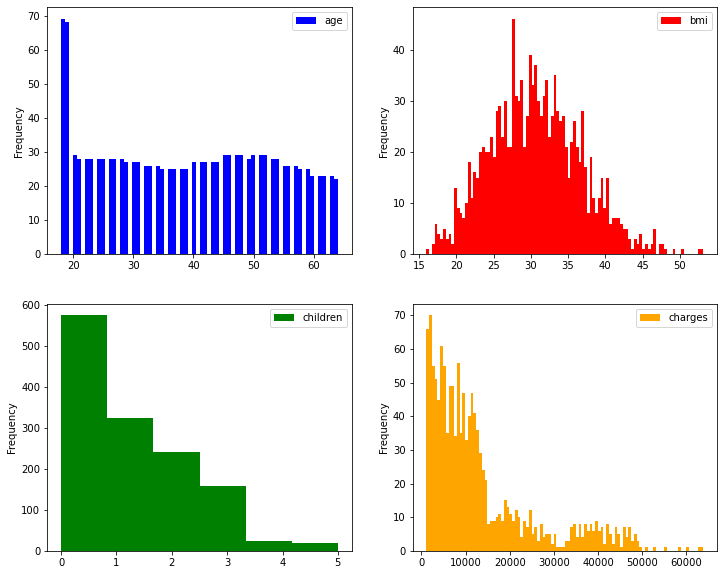

In [26]:
# Lets do some Exploratory data analysis for the insights in the data 
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,10))
dt.plot(kind='hist',y='age',bins=70,color='b',ax=axes[0][0])
dt.plot(kind='hist',y='bmi',bins=100,color='r',ax=axes[0][1])
dt.plot(kind='hist',y='children',bins=6,color='g',ax=axes[1][0])
dt.plot(kind='hist',y='charges',bins=100,color='orange',ax=axes[1][1])
plt.show()

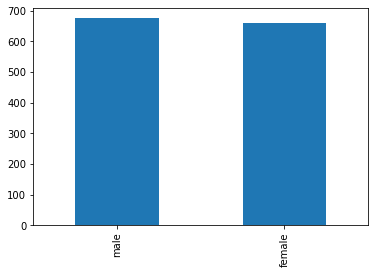

In [27]:
dt['sex'].value_counts().plot(kind='bar')

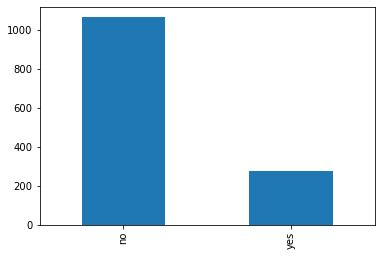

In [29]:
dt['smoker'].value_counts().plot(kind='bar')

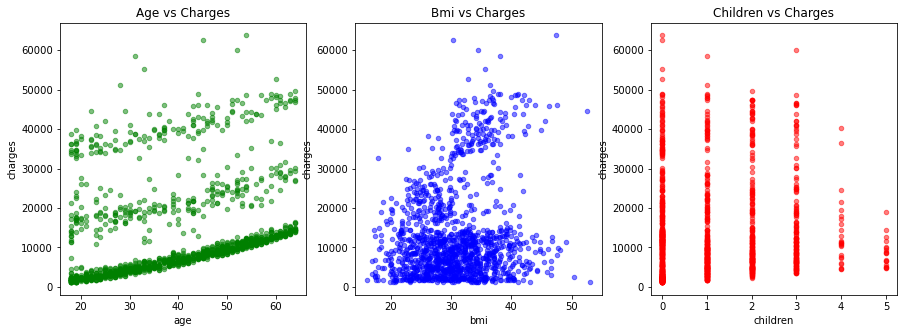

In [33]:

fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
dt.plot(kind='scatter',x='age',y='charges',alpha=0.5,color='green',ax=axes[0],title='Age vs Charges')
dt.plot(kind='scatter',x='bmi',y='charges',alpha=0.5,color='blue',ax=axes[1],title='Bmi vs Charges')
dt.plot(kind='scatter',x='children',y='charges',alpha=0.5,color='red',ax=axes[2],title='Children vs Charges')

plt.show()

In [34]:
#import seaborn library
import seaborn as sns

C:\Users\DINESH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


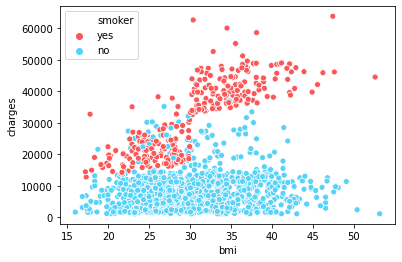

In [35]:
pal=['#FA5858','#58D3F7']
sns.scatterplot(x='bmi',y='charges',data=dt,palette=pal,hue='smoker')

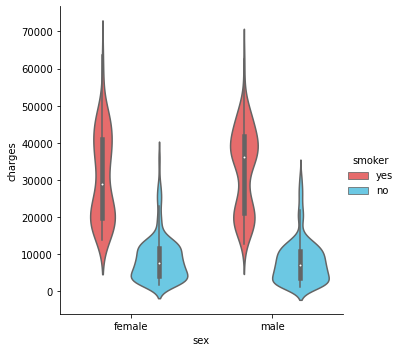

In [36]:
# Violin plot
pal=['#FA5858','#58D3F7']
sns.catplot(x='sex',y='charges',data=dt,palette=pal,kind='violin',hue='smoker')

Text(0.5, 1.0, 'smokers')

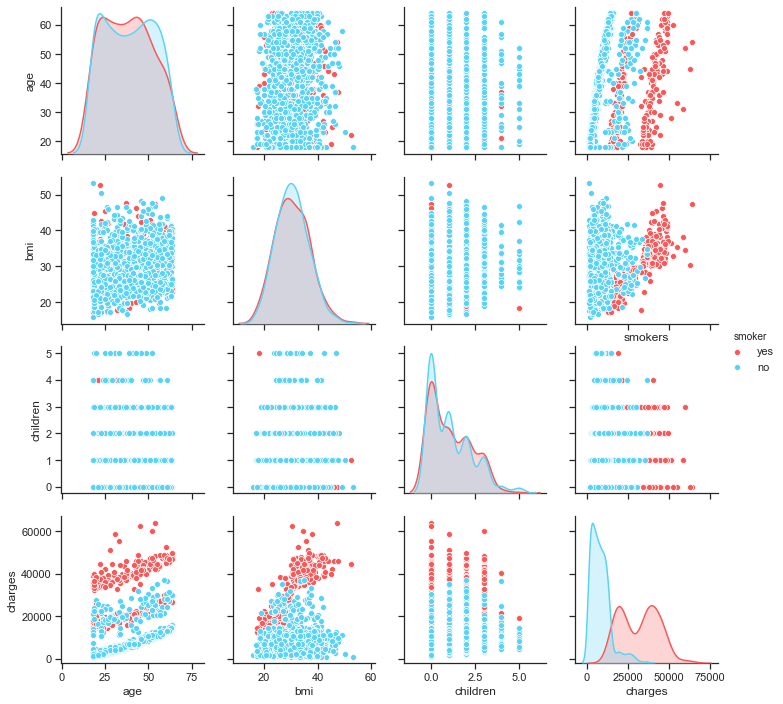

In [37]:
# pair plot for the data
sns.set(style='ticks')
pal=['#FA5858','#58D3F7']

sns.pairplot(dt,hue='smoker',palette=pal)
plt.title('smokers')

# Preparing data for Machine Learning Algorithms

In [38]:
dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
dt['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [41]:
#Lets remove the region
dt.drop(['region'],axis=1,inplace=True)
dt.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [42]:
# changing the binary categories to 1s and 0s
dt.sex.replace({'female':1,'male':0},inplace=True)
dt.smoker.replace({'yes':1,'no':0},inplace=True)

In [43]:
#Let's check whether the categories have been changed to os and 1s or not
dt.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [44]:
# separating features and target variable from the data
x=dt.drop(['charges'],axis=1)
y=dt.charges

# modeling of our data

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101)

model.fit(x_train,y_train)

y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

print(model.score(x_test,y_test))

0.7556261439856182


Score is the R2 score, which varies between 0 and 100%,it is closely related to MSE but not the same
it is the proportion of the variance in the dependent variable that is predictable form the independent
(Totalvariance expained by model)/Total variance. if it is 100% then two variable are perfectly correlated

In [50]:
results=pd.DataFrame({'actual':y_test,'predicted':y_test_pred})
results

,actual,predicted
44,6079.67150,10351.077451
134,2457.21115,2448.329983
980,25517.11363,10242.484095
618,34439.85590,27158.549290
1238,6985.50695,6183.977568
...,...,...
758,5428.72770,9572.192501
267,14590.63205,14769.230088
958,41034.22140,34304.724268
987,28340.18885,8670.855097


In [53]:
# Let's normalize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [67]:
#Lets Train Linear regression model on the normalized data

multiple_linear_reg=LinearRegression(fit_intercept=False)

multiple_linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [61]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features=PolynomialFeatures(degree=3)  # create a polynomialfeatures instance in degree3

x_train_poly=polynomial_features.fit_transform(x_train)  #fit and tranform the training data to polynomial
x_test_poly=polynomial_features.fit_transform(x_test)    #fit and transform the testing dta to polynomial

polynomial_reg=LinearRegression(fit_intercept=False)  # create a instance for Linear Regression model

polynomial_reg.fit(x_train_poly,y_train)     #fit data to the model

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [62]:
from sklearn.tree import DecisionTreeRegressor   #import decision tree regressor

decision_tree_reg=DecisionTreeRegressor(max_depth=5,random_state=101) # create a instance for decision tree regressor
decision_tree_reg.fit(x_train,y_train)   # fit data to the model

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=101, splitter='best')

In [63]:
from sklearn.ensemble import RandomForestRegressor  #import Random Fores regressor

random_forest_reg=RandomForestRegressor(n_estimators=400,max_depth=5,random_state=101) # create a instance for decision tree regressor
random_forest_reg.fit(x_train,y_train)   # fit data to the model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=101, verbose=0,
                      warm_start=False)

In [65]:
from sklearn.svm import SVR #import support vector regressor

support_vector_reg=SVR(gamma='auto',kernel='linear',C=1000)  #create a instance for support vector regression model
support_vector_reg.fit(x_train,y_train)   #fir data to the model

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [66]:
from sklearn.model_selection import cross_val_predict # for k-fold cross validation
from sklearn.metrics import r2_score  # for finding the accuracy with R2 score
from sklearn.metrics import mean_squared_error #for MSE
from math import sqrt  # for square root operation

# Evaluating Multiple Linear Regression Model

In [69]:
# prediction with training data set
y_pred_mlr_train=multiple_linear_reg.predict(x_train)

#prediction with the testing dataset
y_pred_mlr_test=multiple_linear_reg.predict(x_test)

#find training accuracy for this model:
accuracy_mlr_train=r2_score(y_train,y_pred_mlr_train)
print('Training accuracy for Multiple Linear Regression Model:',accuracy_mlr_train)
# find testing accuracy for this model:

accuracy_mlr_test=r2_score(y_test,y_pred_mlr_test)
print('Testing accuracy for Multiple Linear Regression Model:',accuracy_mlr_test)

# Find RMSE for training data
rmse_mlr_train=sqrt(mean_squared_error(y_train,y_pred_mlr_train))
print('rmse for training data:',rmse_mlr_train)

# Find RMSE for testing data
rmse_mlr_test=sqrt(mean_squared_error(y_test,y_pred_mlr_test))
print('rmse for training data:',rmse_mlr_train)

# prediction with 10-fold cross validation

y_pred_cv_mlr=cross_val_predict(multiple_linear_reg,x,y,cv=10)

#finding accuracy after 10 fold cross validation

accuracy_cv_mlr=r2_score(y,y_pred_cv_mlr)
print('Accuracy for 10-fold cross validation multiple linear regression model:',accuracy_cv_mlr)

Training accuracy for Multiple Linear Regression Model: -0.4667413860029752
Testing accuracy for Multiple Linear Regression Model: -0.5417105035310612
rmse for training data: 14728.635309994495
rmse for training data: 14728.635309994495
Accuracy for 10-fold cross validation multiple linear regression model: 0.717113419200113


# Evaluating polynomial regression model

In [71]:
# Prediction with training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(x), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  0.8514250350939068
Testing Accuracy for Polynomial Regression Model:  0.8329768049973043
RMSE for Training Data:  4687.6864394579225
RMSE for Testing Data:  4874.884520493209
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.8391072917686251


# Evaluating Decision Tree Regression Model

In [75]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(x_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(x_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, x, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.8838122910142212
Testing Accuracy for Decision Tree Regression Model:  0.8417463831565577
RMSE for Training Data:  4145.3941470241025
RMSE for Testing Data:  4745.1807618855555
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8494241031595924


# Evaluating Random Forest Regression Model

In [77]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(x_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(x_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, x, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.8929222612681637
Testing Accuracy for Random Forest Regression Model:  0.8447245914259479
RMSE for Training Data:  3979.5625140723973
RMSE for Testing Data:  4700.318410945287
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8575685799053346


# Evaluating Support Vector Regression Model

In [78]:
# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(x_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(x_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(support_vector_reg, x, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
print("Accuracy for 10-Fold Cross Predicted Support Vector Regression Model: ", accuracy_cv_SVR)

Training Accuracy for Support Vector Regression Model:  0.6631799489061354
Testing Accuracy for Support Vector Regression Model:  0.7202028876945699
RMSE for Training Data:  7058.049574438286
RMSE for Testing Data:  6309.537890290635
Accuracy for 10-Fold Cross Predicted Support Vector Regression Model:  0.7058131213464467


In [82]:
# Compare all results in one table
training_accuracies = [accuracy_mlr_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_mlr_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [rmse_mlr_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [rmse_mlr_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_mlr, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR]

parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=5", "n_estimators=400, max_depth=5", "kernel=”linear”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-0.466741,-0.541711,14728.635310,14810.760337,0.717113
Polynomial Regression,fit_intercept=False,0.851425,0.832977,4687.686439,4874.884520,0.839107
Decision Tree Regression,max_depth=5,0.883812,0.841746,4145.394147,4745.180762,0.849424
Random Forest Regression,"n_estimators=400, max_depth=5",0.892922,0.844725,3979.562514,4700.318411,0.857569
Support Vector Regression,"kernel=”linear”, C=1000",0.663180,0.720203,7058.049574,6309.537890,0.705813


# Our best classifier is our Random Forests using 400 estimators and a max_depth of 5

**R^2 (coefficient of determination) regression score function.**

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

# Let's test our best regression on some new data

In [84]:
# The data is of mine let's check how much premium i will be paying from the model which we have built
input_data = {'age': [23],
              'sex': ['male'],
              'bmi': [13],
              'children': [0],
              'smoker': ['yes'],
              'region': ['southeast']}

input_data = pd.DataFrame(input_data)
input_data

,age,sex,bmi,children,smoker,region
0,23,male,13,0,yes,southeast


In [85]:
# Our simple pre-processing 
input_data.drop(["region"], axis=1, inplace=True) 
input_data['sex'] = input_data['sex'].map(lambda s :1  if s == 'female' else 0)
input_data['smoker'] = input_data['smoker'].map(lambda s :1  if s == 'yes' else 0)
input_data

,age,sex,bmi,children,smoker
0,23,0,13,0,1


In [86]:
# Scale our input data  
input_data = sc.transform(input_data)
input_data

array([[-1.14383184, -0.98515504, -2.88779873, -0.92484871,  1.91444934]])

In [87]:
# Reshape our input data in the format required by sklearn models
input_data = input_data.reshape(1, -1)
print(input_data.shape)
input_data

(1, 5)


array([[-1.14383184, -0.98515504, -2.88779873, -0.92484871,  1.91444934]])

In [88]:
# Get our predicted insurance rate for our new customer
random_forest_reg.predict(input_data)

array([15924.53808645])

In [89]:
# Note Standard Scaler remembers your inputs so you can use it still here
print(sc.mean_)
print(sc.scale_)

[39.03090728  0.49252243 30.62035892  1.10967099  0.21435693]
[14.01509092  0.49994408  6.10165754  1.19984055  0.41037548]
